# Calculate CO$_2$ emissions related to European electricity generation - Part 2 - Visualisation

Visualise the calculated emission values related to public electricity generation for the EU27 countries plus Great Britain and Norway for the period from 1990 to 2018.

In [1]:
## Using Python 3.7
import pandas as pd                # using version '1.1.1' including the pyxlsb package version '1.0.8'
import matplotlib.pyplot as plt    # using matplotlib version '3.3.1'
import matplotlib
import itertools

In [2]:
## Read data files created in part 1
elec_emission = pd.read_csv('data/results/elec_emissions.csv', index_col=(0,1)).squeeze()
elec_emission_incl_autoprod = pd.read_csv('data/results/elec_emission_incl_autoprod.csv', index_col=(0,1)).squeeze()

In [3]:
countries = elec_emission.index.get_level_values(0).unique().values

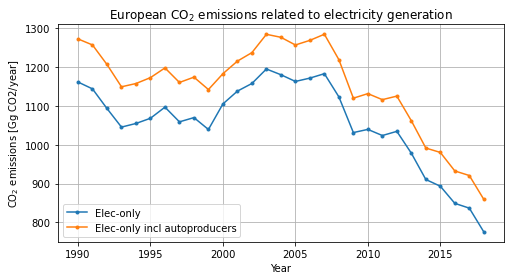

In [4]:
## Plot European totals (EU27+GB+NO)
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(elec_emission.sum(level=1), '.-', label='Elec-only')
ax.plot(elec_emission_incl_autoprod.sum(level=1), '.-', label='Elec-only incl autoproducers')

ax.set(xlabel='Year', ylabel='CO$_2$ emissions [Gg CO2/year]',
       title='European CO$_2$ emissions related to electricity generation')
ax.grid()
plt.legend()
plt.show()

fig.savefig('data/results/emission_evolution_EU.png')

## Plot all countries together

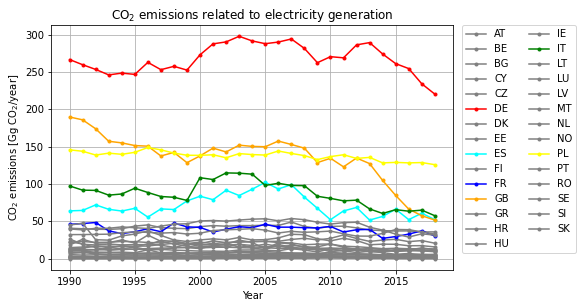

In [5]:
fig, ax = plt.subplots(figsize=(9, 4.5))

for i, ct in enumerate(countries):
    color='gray'
    if ct=='DE':
        color='red'
    elif ct=='GB':
        color='orange'
    elif ct=='PL':
        color='yellow'
    elif ct=='IT':
        color='green'
    elif ct=='ES':
        color='cyan'
    elif ct=='FR':
        color='blue'
    ax.plot(elec_emission[ct], '.-', color=color, label=ct)

ax.set(xlabel='Year', ylabel='CO$_2$ emissions [Gg CO$_2$/year]',
       title='CO$_2$ emissions related to electricity generation')
ax.grid()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.legend(ncol=2, bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.show()

fig.savefig('data/results/emission_evolution_countries.png')

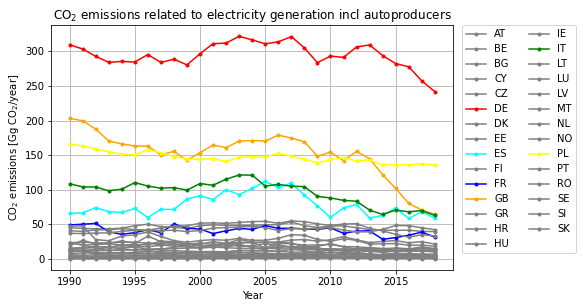

In [6]:
fig, ax = plt.subplots(figsize=(9,4.5))

for i, ct in enumerate(countries):
    color='gray'
    if ct=='DE':
        color='red'
    elif ct=='GB':
        color='orange'
    elif ct=='PL':
        color='yellow'
    elif ct=='IT':
        color='green'
    elif ct=='ES':
        color='cyan'
    elif ct=='FR':
        color='blue'
    ax.plot(elec_emission_incl_autoprod[ct], '.-', color=color, label=ct)

ax.set(xlabel='Year', ylabel='CO$_2$ emissions [Gg CO$_2$/year]',
       title='CO$_2$ emissions related to electricity generation incl autoproducers')
ax.grid()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.legend(ncol=2, bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.show()

fig.savefig('data/results/emission_incl_autoprod_evolution_countries.png')

## Plot pie charts

In [7]:
def plot_pie_charts(fig, ax, emis, year, cut_off_value, colors):
    dic = emis.loc[:,year].sort_values().to_dict()
    newdic={}
    for key, group in itertools.groupby(dic, lambda k: 'Others' if (dic[k]< cut_off_value) else k):
         newdic[key] = sum([dic[k] for k in list(group)])   
    labels = newdic.keys()
    sizes = newdic.values()
    ax.pie(sizes, labels=labels, colors=colors, 
            autopct='%1.1f%%', 
            startangle=90, pctdistance=0.85)#, explode = [0.2]*len(countries))
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    ax.text(0, 0, str(year), fontdict={'fontsize':24, 'weight':'ultralight'}, ha='center', va='center')
    ax.axis('equal')

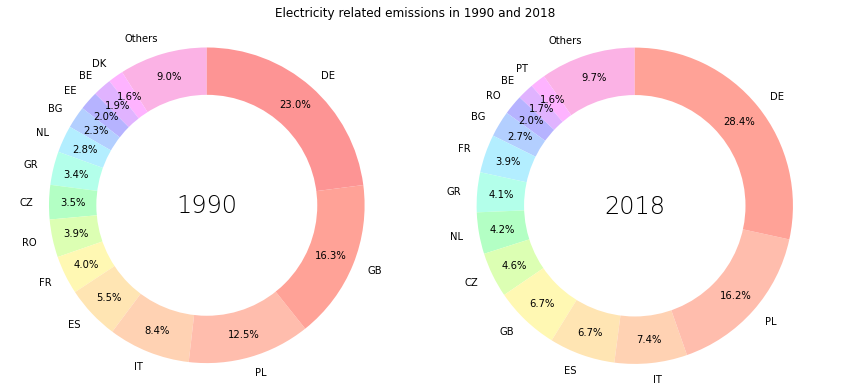

In [8]:
fig, axes = plt.subplots(1,2,figsize=(12,5.5))

colors = ['#fd9494','#ffa297','#ffbdad','#ffd2b3','#ffe5b3','#fff8b3','#dcffb3','#b3ffc4','#b3ffea','#b3eeff','#b3cfff','#b6b3ff','#e0b3ff','#feb3ff','#fbb2e5'][::-1]
plot_pie_charts(fig, axes[0], elec_emission, 1990, 16, colors)
plot_pie_charts(fig, axes[1], elec_emission, 2018, 12, colors)

plt.suptitle('Electricity related emissions in 1990 and 2018')
plt.tight_layout()
fig.savefig('data/results/emission_evolution_countries_pie_charts.png')

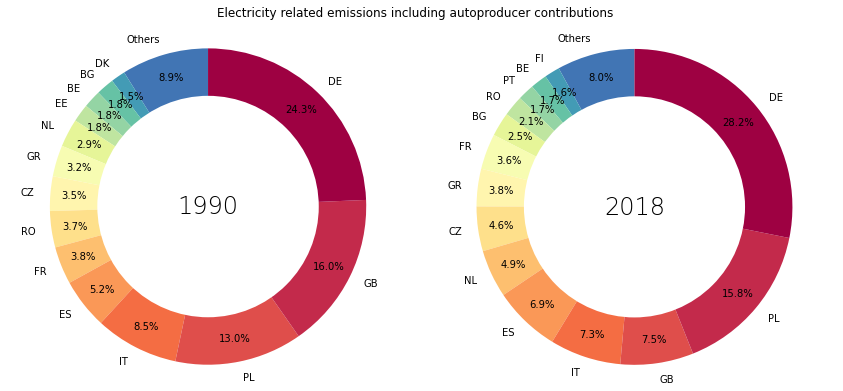

In [9]:
fig, axes = plt.subplots(1,2,figsize=(12,5.5))

cmap = matplotlib.cm.get_cmap('Spectral')
colors = [cmap(i/15) for i in range(15)][::-1]
plot_pie_charts(fig, axes[0], elec_emission_incl_autoprod, 1990, 16, colors)
plot_pie_charts(fig, axes[1], elec_emission_incl_autoprod, 2018, 12, colors)

plt.suptitle('Electricity related emissions including autoproducer contributions')
plt.tight_layout()
fig.savefig('data/results/emission_incl_autoprod_evolution_countries_pie_charts.png')

## Plot all countries individually

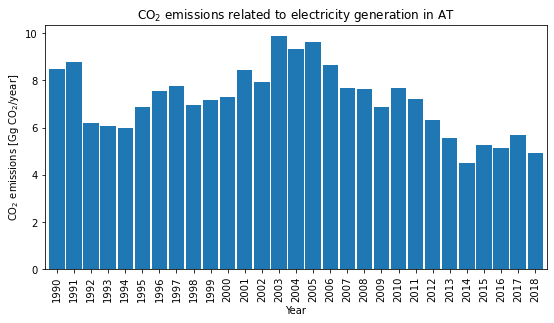

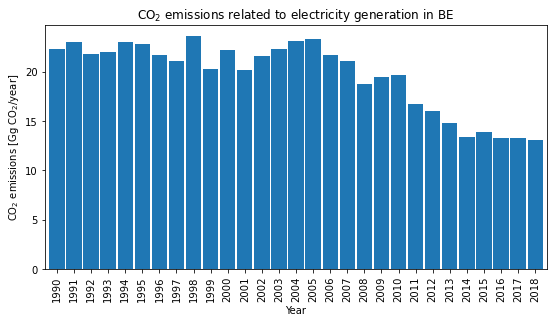

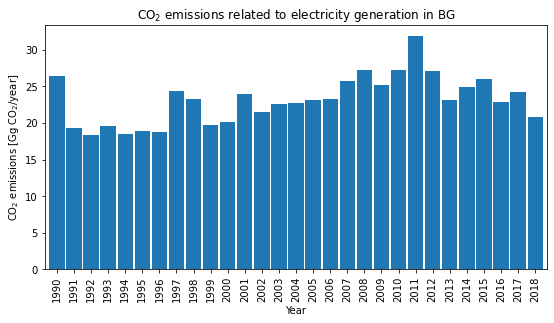

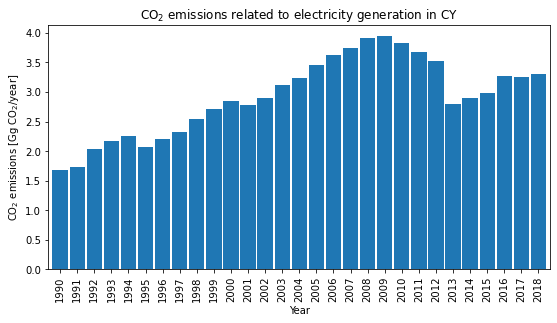

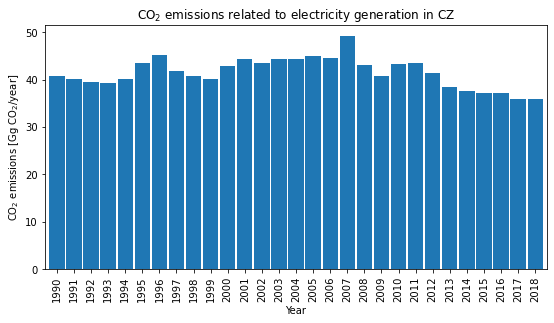

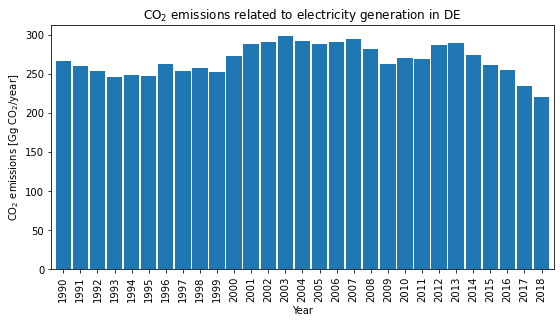

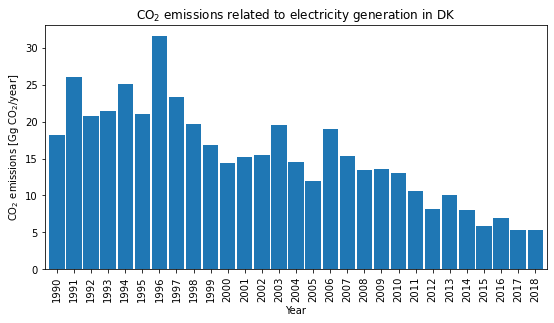

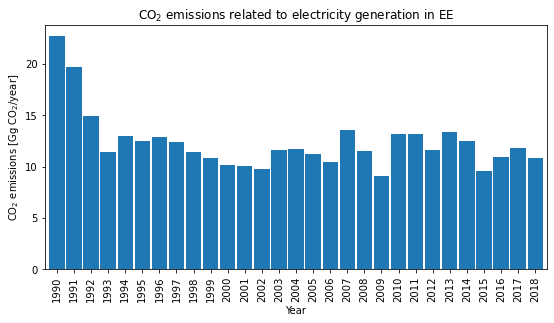

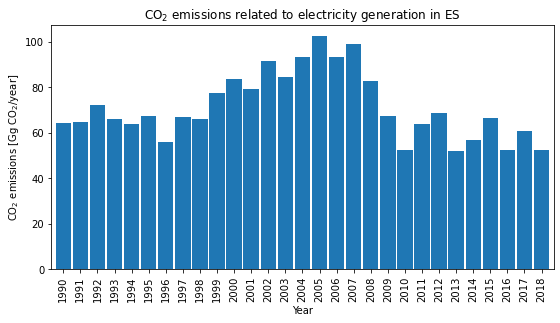

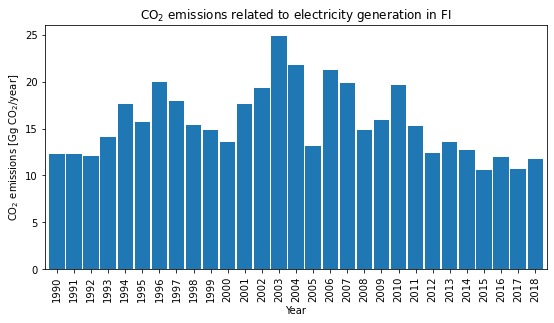

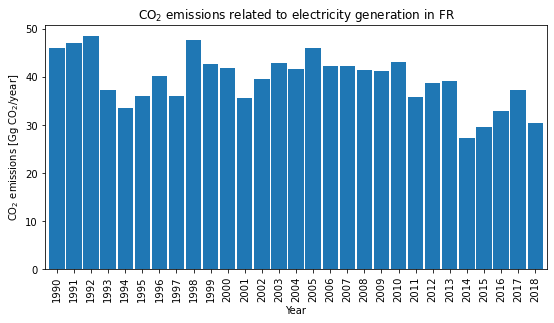

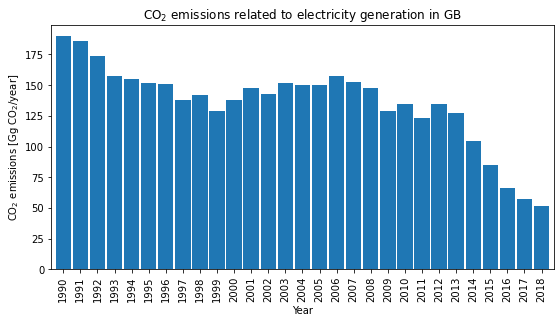

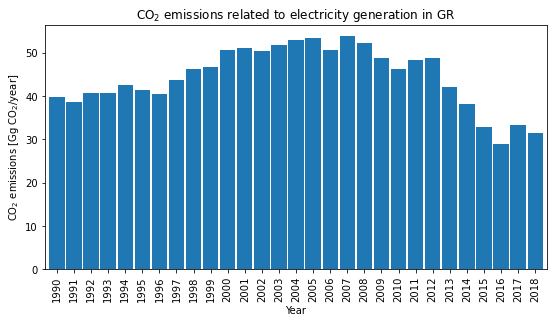

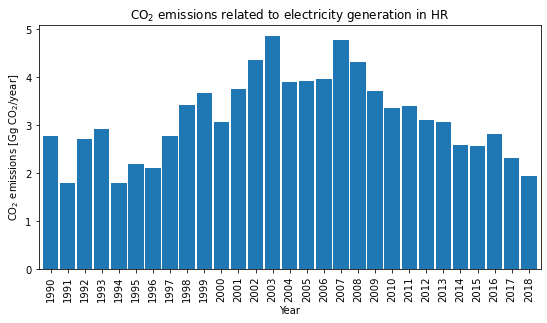

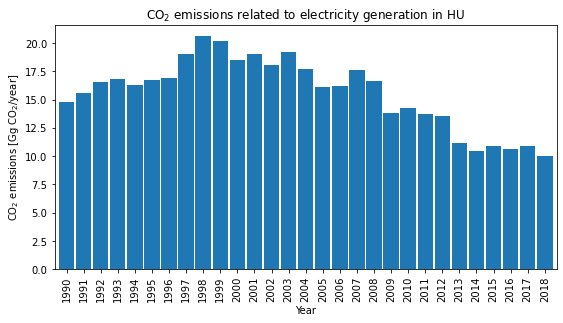

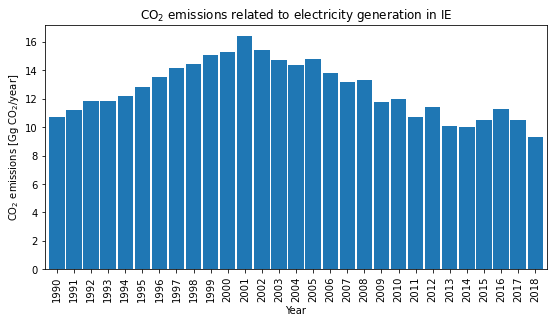

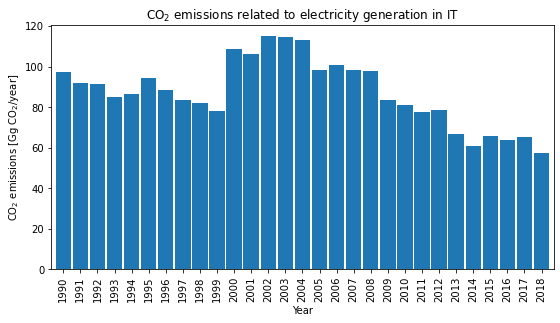

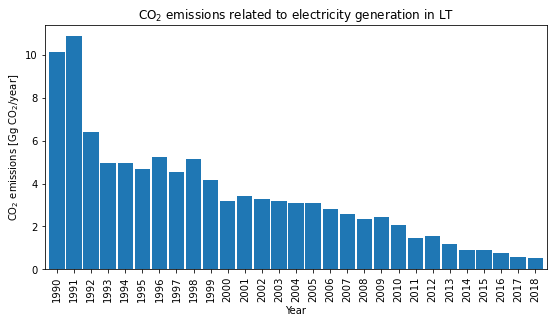

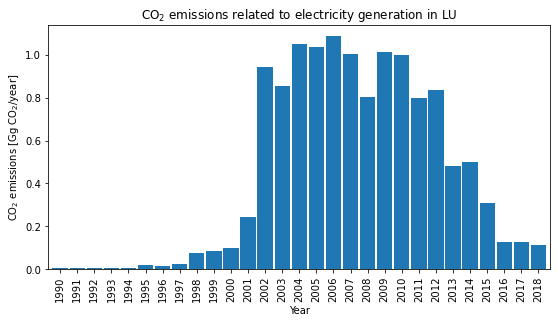

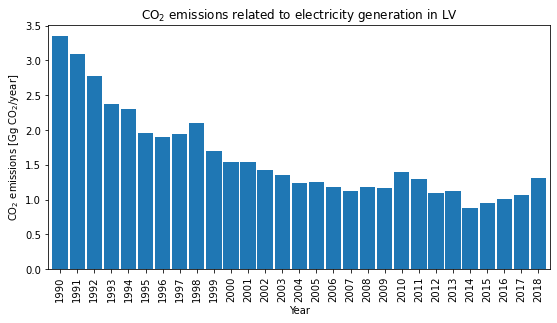

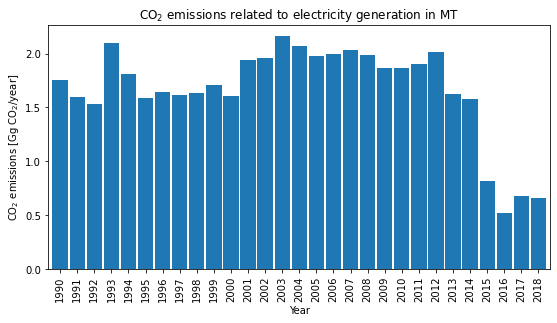

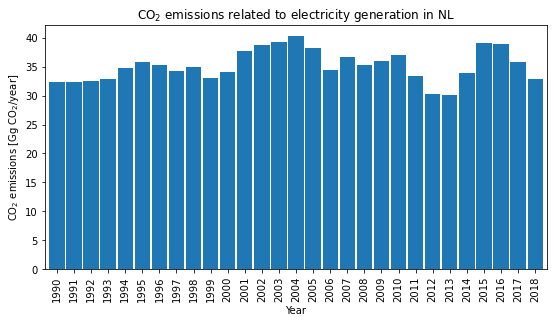

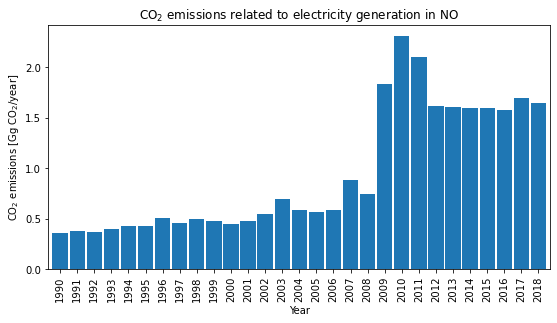

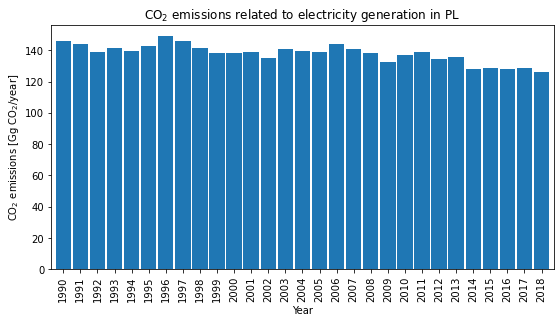

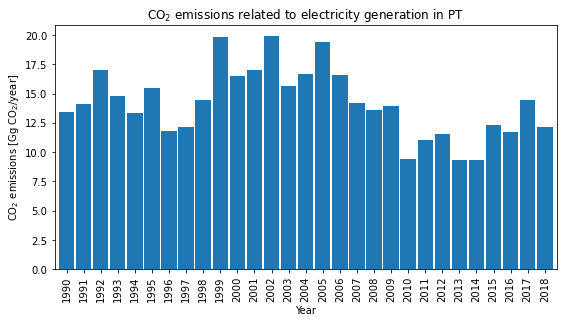

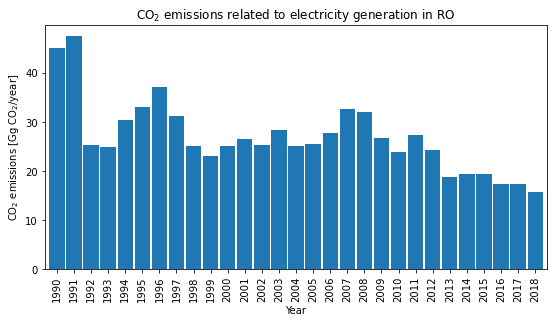

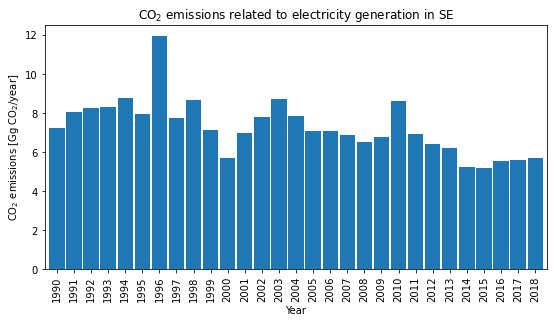

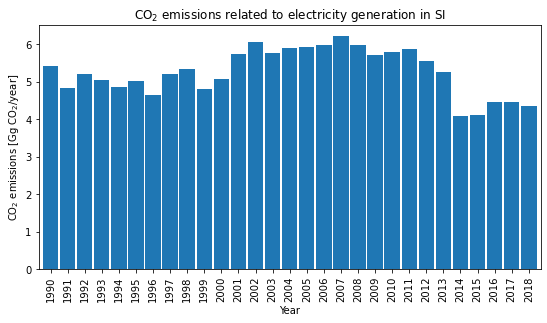

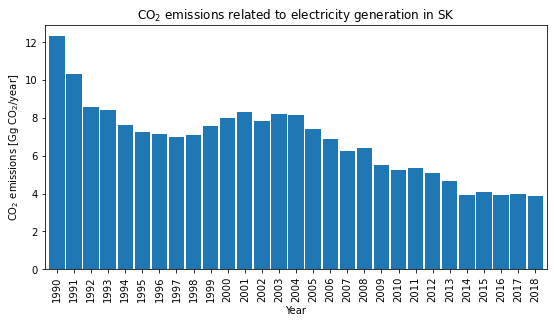

In [10]:
for country in countries:
    fig, ax = plt.subplots(figsize=(9, 4.5))

    elec_emission[country].plot.bar(width=0.9)

    ax.set(xlabel='Year', ylabel='CO$_2$ emissions [Gg CO$_2$/year]',
           title='CO$_2$ emissions related to electricity generation in {}'.format(country))
    plt.show()
    fig.savefig('data/results/emission_evolution_by_country/elec_only_emission_evolution_{}.png'.format(country))

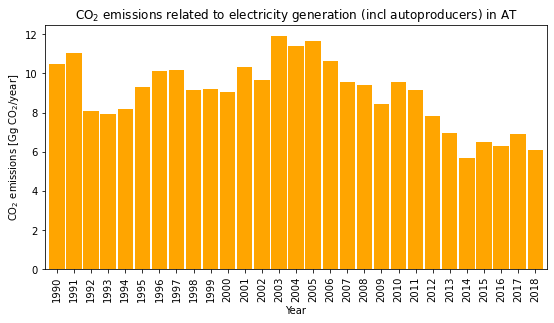

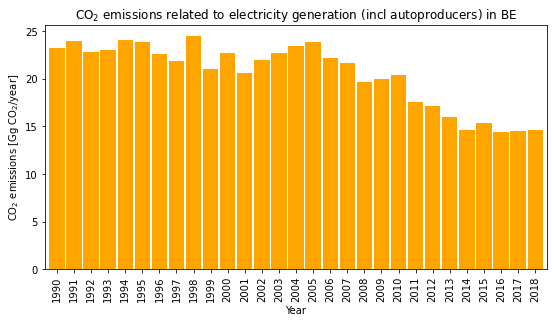

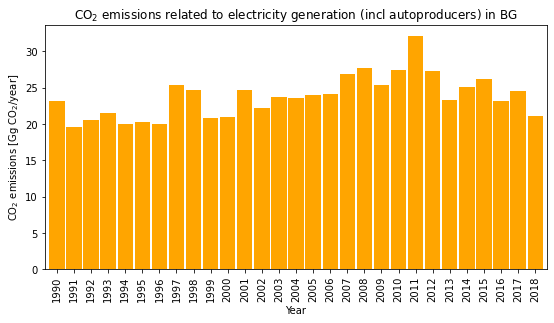

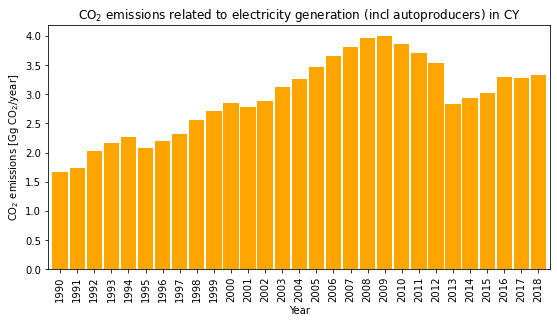

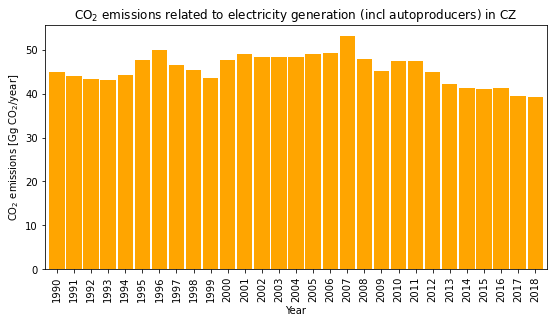

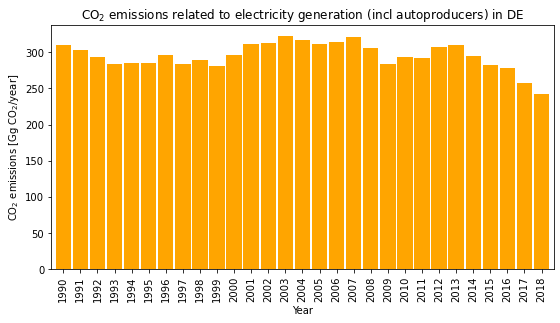

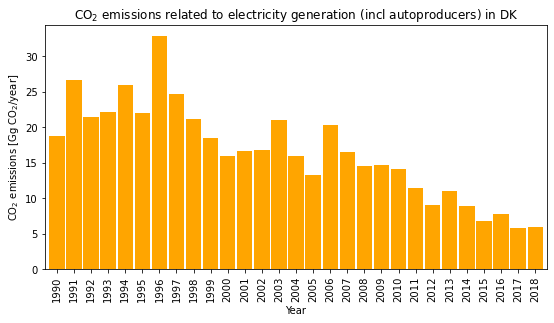

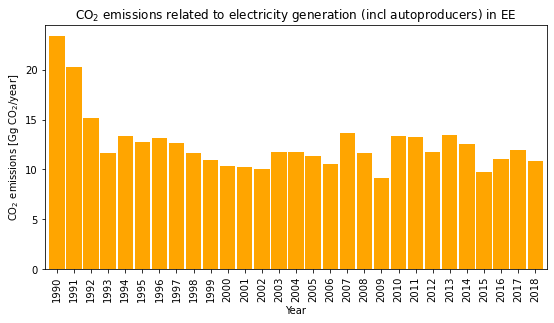

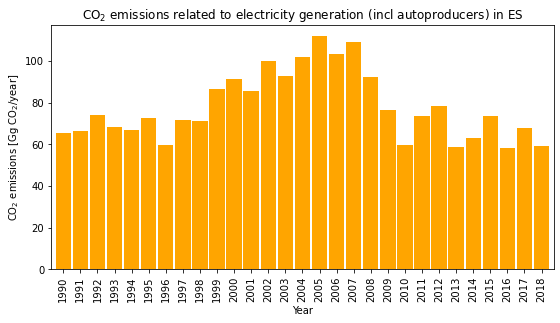

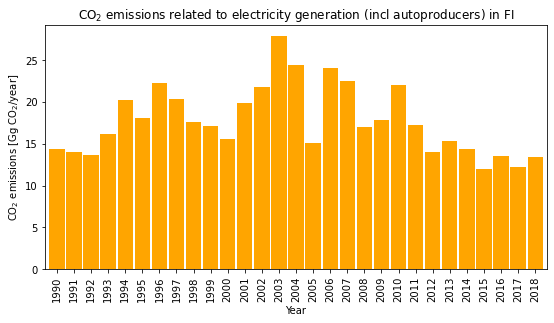

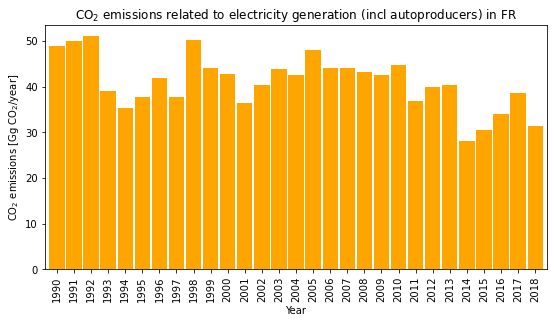

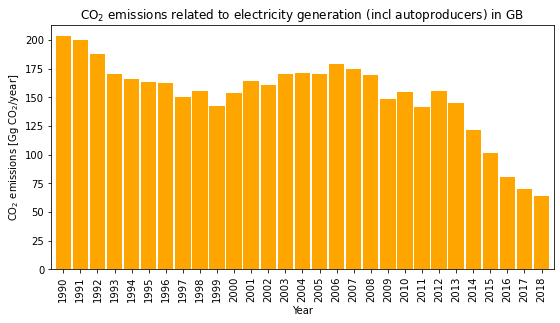

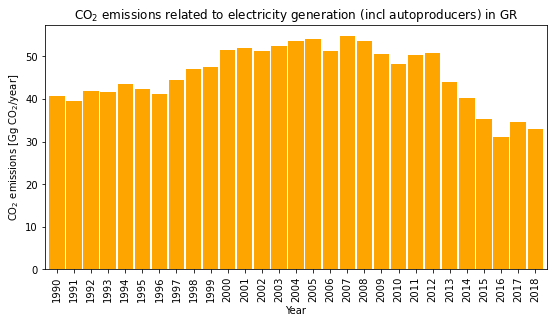

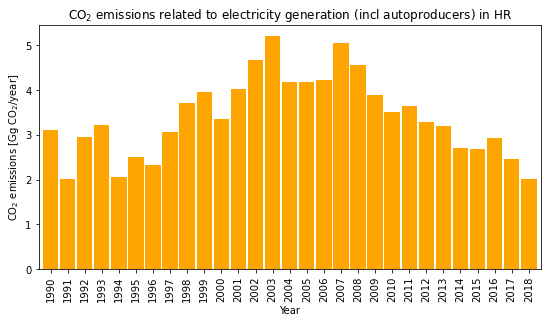

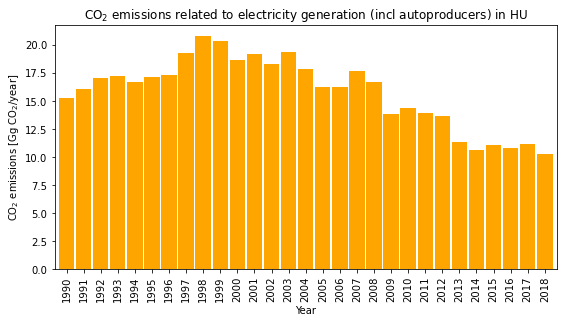

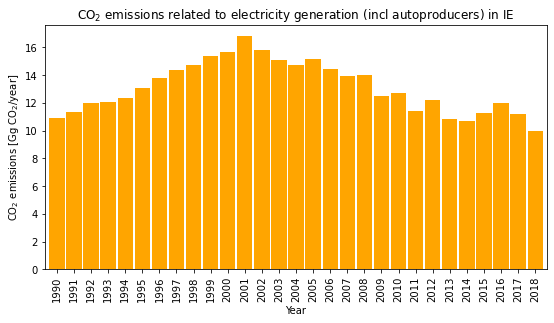

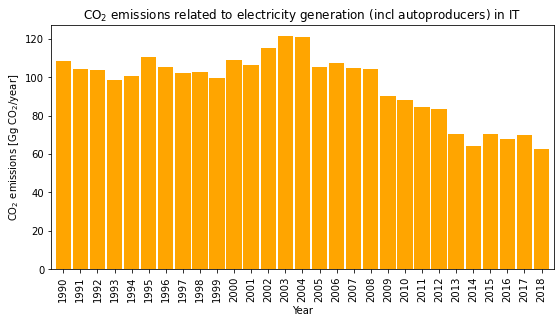

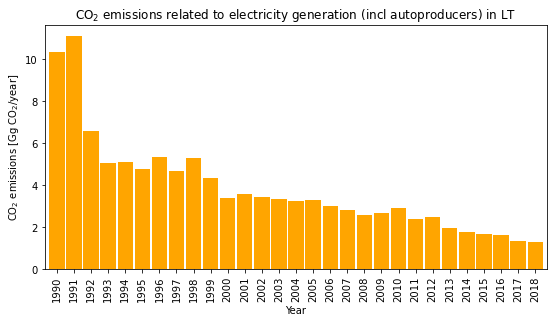

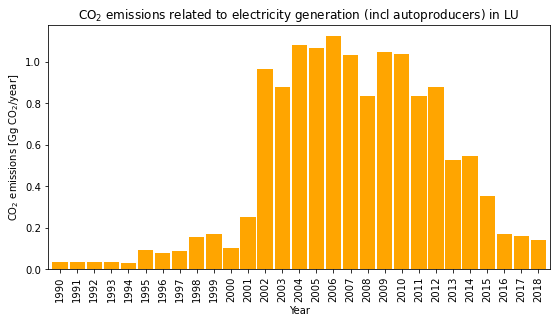

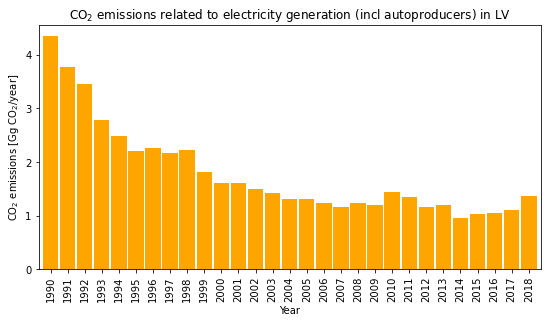

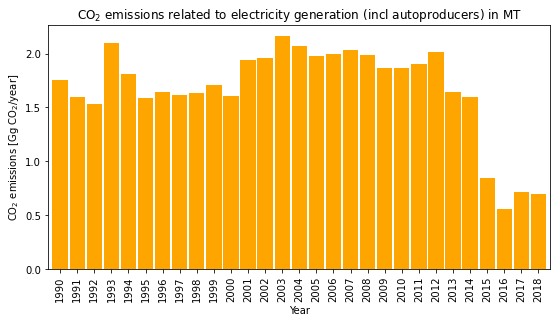

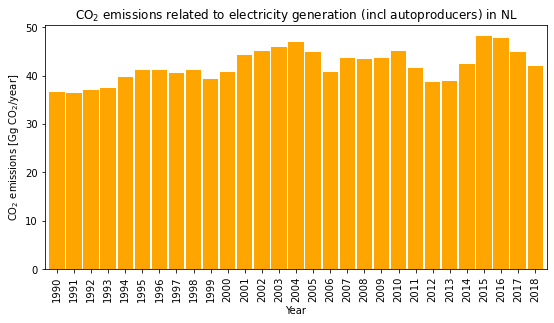

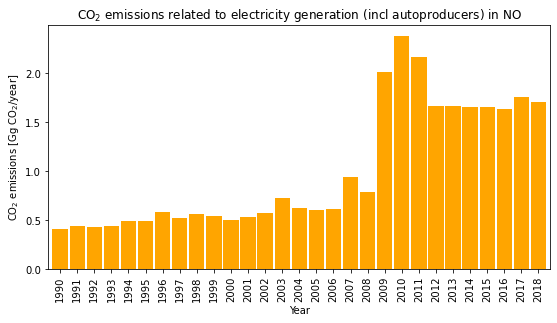

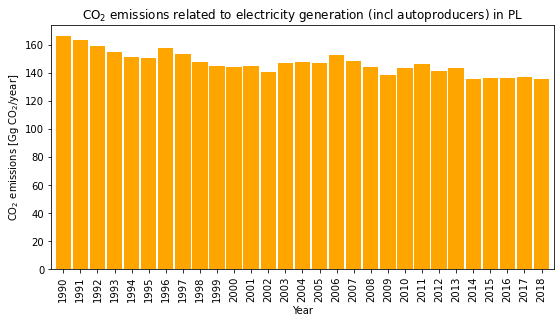

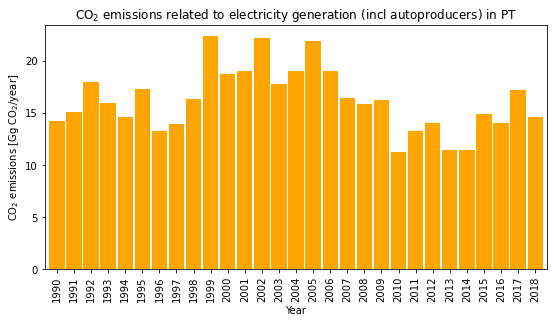

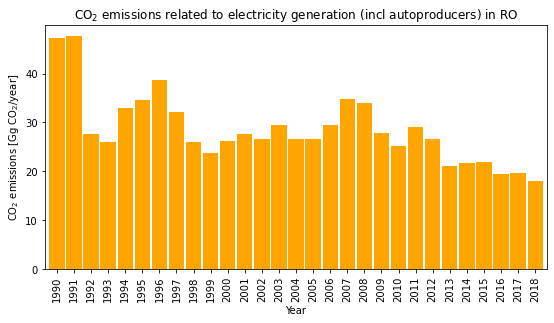

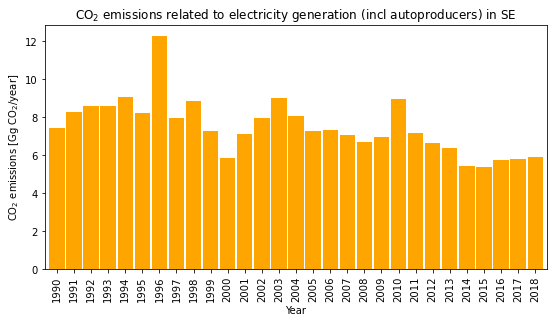

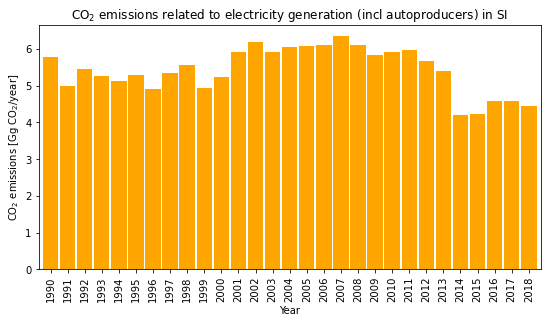

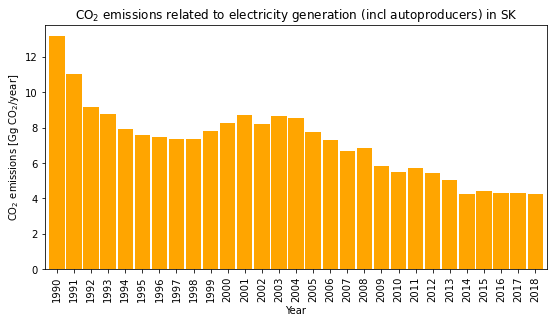

In [11]:
for country in countries:
    fig, ax = plt.subplots(figsize=(9, 4.5))

    elec_emission_incl_autoprod[country].plot.bar(width=0.9, color='orange')

    ax.set(xlabel='Year', ylabel='CO$_2$ emissions [Gg CO$_2$/year]',
           title='CO$_2$ emissions related to electricity generation (incl autoproducers) in {}'.format(country))
    plt.show()
    fig.savefig('data/results/emission_evolution_by_country/elec_only_incl_autoprod_emission_evolution_{}.png'.format(country))